<Container object of 3 artists>

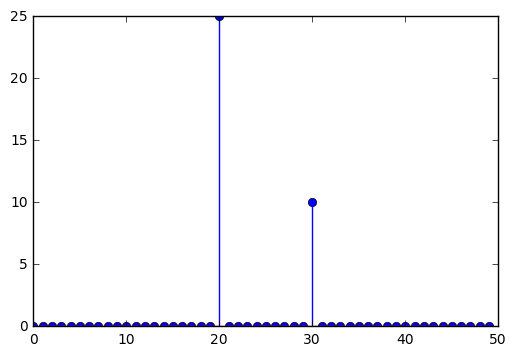

In [1]:
t = np.arange(0, 1, 1/100) #100Hz sampling rate
s = .5*sin(2*pi*t*20) + .2*sin(2*pi*30*t) # sum of 2 sine waves at 20 and 30 Hz
spect = fft.fft(s) # Compute FFT
magSpect = abs(spect) 
#plot(magSpect[0:50])

stem(magSpect[0:50]) #Plot the first 50 of 100 bins 

# since we have anaysed a signal for exactly 1 second, 
# the n-th element (or "bin") of the FFT correspond to a frequency component of  nn  Hz. 
# This won't always be the case, though!

# You can use the fft.fftfreq() function to compute the frequencies associated with each bin in your spectrum array.

# The first argument is the length of the FFT, 
# and the second argument is the time in-between samples (i.e., 1/sample_rate):

In [2]:
fft.fftfreq(1024, 1/44100) #gives us frequencies for a 1024-bin FFT at 44100Hz sample rate

array([   0.        ,   43.06640625,   86.1328125 , ..., -129.19921875,
        -86.1328125 ,  -43.06640625])

In [3]:
fft.fftfreq(1024, 1/44100)[256] # use array notation to work out freq of 256th bin

11025.0

In [4]:
# a. Create a signal that is the sum of three sines, at 200, 300, and 600 Hz. 
# Choose a different amplitude for each sine, being careful that the amplitudes sum to something less than 1. 
# This signal should be sampled at 44100 Hz, for a total duration of 1 second.
tt = arange(0, 1, 1/44100)
ss1 = .4*sin(200*tt * 2*pi)
ss2 = .3*sin(300*tt * 2*pi)
ss3 = .25*sin(600*tt * 2*pi)
ssum = ss1 + ss2 + ss3

# Use the play function to play your signal.

# play(ssum)

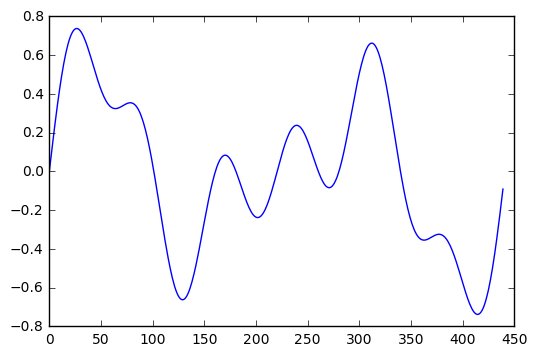

In [5]:
plot(ssum[0:440])

512


<Container object of 3 artists>

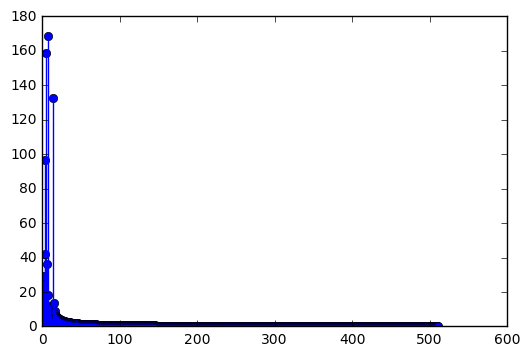

In [6]:
# Compute the magnitude spectrum for the first 1024 samples of your signal. 
# Plot the spectrum, using bins 0 to 512 (i.e. from 0 to the Nyquist rate). 

spec = fft.fft(ssum[0:1024])
magSpec = abs(spec)
halfSiz = int(size(magSpec)/2)
print halfSiz
stem(magSpec[0:halfSiz])



<Container object of 3 artists>

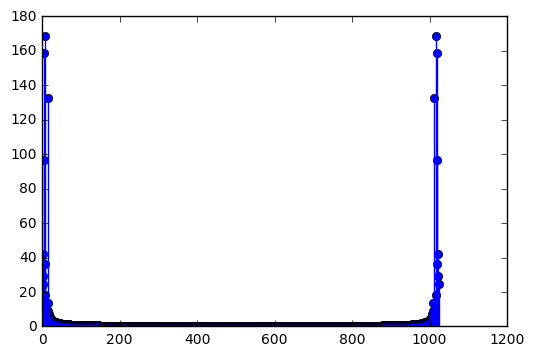

In [71]:
stem(magSpec)

In [7]:
freqs = fft.fftfreq(1024, 1/44100)
freqs

array([   0.        ,   43.06640625,   86.1328125 , ..., -129.19921875,
        -86.1328125 ,  -43.06640625])

In [8]:
?plot


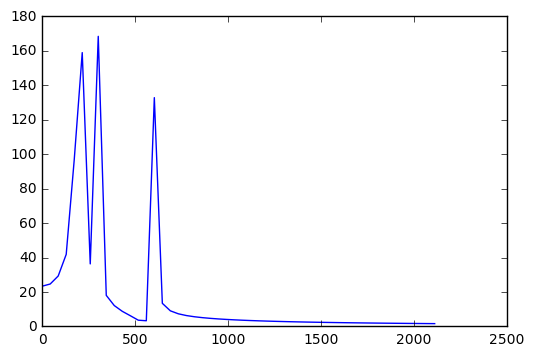

In [9]:
plot(freqs[0:50], magSpec[0:50])

In [10]:
mySound = wavReadMono("/Users/pesa/Documents/UNI/MC2/samples/349231__cold00n__174-sec-lab-neurosynth-c1-b.wav")

/Users/pesa/anaconda2/lib/python2.7/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


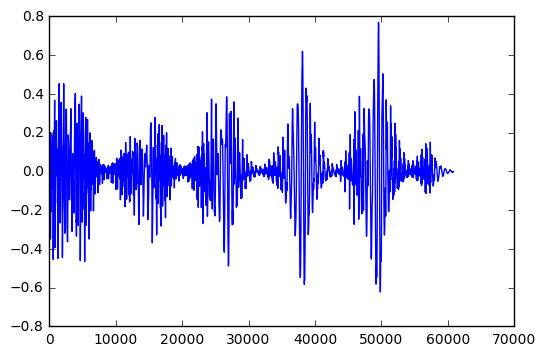

In [11]:
play(mySound)
plot(mySound)

60828


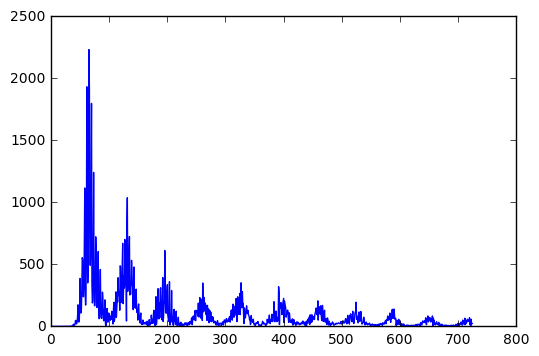

In [187]:
mss = size(mySound)
print(mss)
halfs=int(mss/2)
freqs2 = fftfreq(mss, 1/44100)
spec2 = fft.fft(mySound[0:mss])
mags2 = abs(spec2)

plot(freqs2[0:1000], mags2[0:1000])

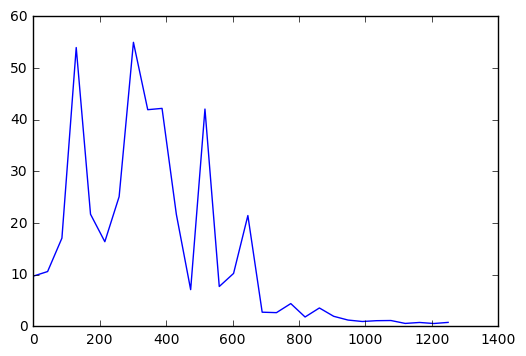

In [13]:
specOnset = fft.fft(mySound[0:1024])
freqs2b = fftfreq(1024, 1/44100)
mags2b = abs(specOnset)

plot(freqs2b[0:30], mags2b[0:30])

<Container object of 3 artists>

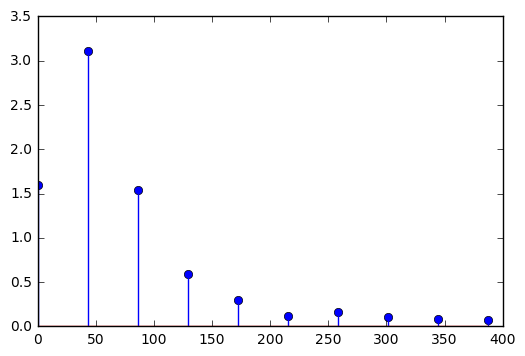

In [14]:
specTail = fft.fft(mySound[mss-1024:mss])
mags2c = abs(specTail)

stem(freqs2b[0:10], mags2c[0:10])

In [15]:
print max(mags2[0:halfs])
print argmax(mags2[0:halfs])

2232.60053255
90


## Part 3: Exploring aliasing

In [16]:
# Generate the following signals:
# s1: An 1800Hz sine tone, sampled at 44100Hz
# s2: An 1800Hz sine tone, sampled at 4000Hz
# s3: An 1800Hz sine tone, sampled at 3000Hz

# Which of these signals will alias? Which frequencies will you actually hear, for each signal? Write your answer below.

In [58]:
t1=arange(0,1,1/44100)
t2=arange(0,1,1/4000)
t3=arange(0,1,1/3000)

s1 = .5*sin(1800*t1 * 2*pi)
s2 = .5*sin(1800*t2 * 2*pi)
s3 = .5*sin(1800*t3 * 2*pi)

# The 3rd waveform will alia. The firt 2 sounds will be synthesised (and therefore heard) at 1800, whilst the last one will fold over.
# The 3rd sound will be heard at 1200Hz, which is 3000-1800

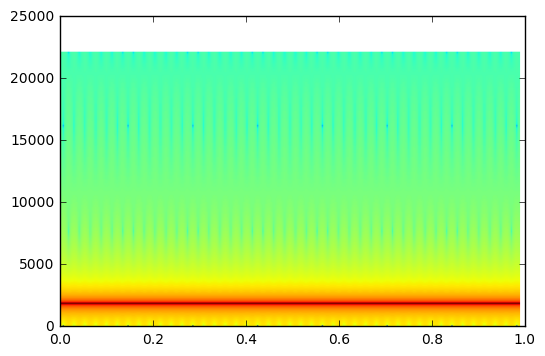

In [46]:
plt.specgram(s1, NFFT = 1024, Fs = 44100, noverlap = 900)
plt.show()
play(s1)


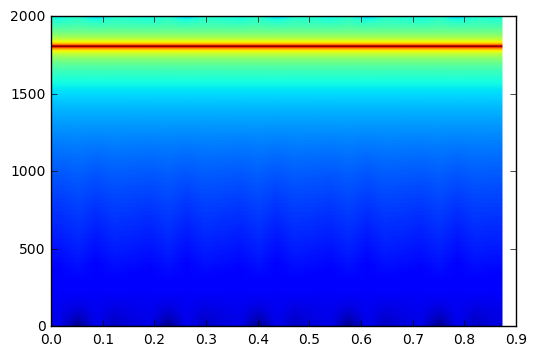

In [60]:
plt.specgram(s2, NFFT = 1024, Fs = 4000, noverlap = 900)
plt.show()
play(s2, rate=4000) #specify rate if it's not 44100 

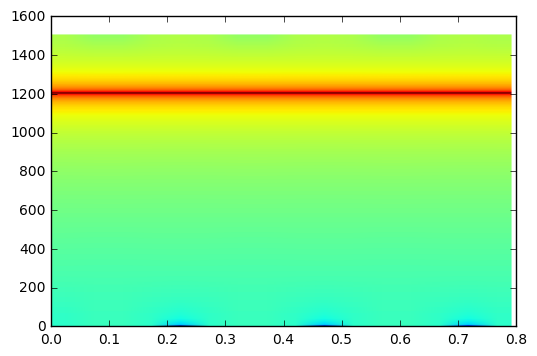

In [56]:
plt.specgram(s3, NFFT = 1024, Fs = 3000, noverlap = 900)
plt.show()
play(s3, rate=3000) #specify rate if it's not 44100 

In [62]:
mySound2 = wavReadMono("/Users/pesa/Documents/UNI/MC2/samples/349233__cold00n__174-d1-1-5s.wav")

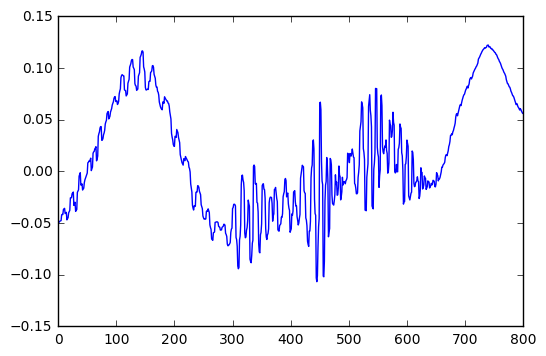

In [168]:
play(mySound2)
plot(mySound2[800:1600])

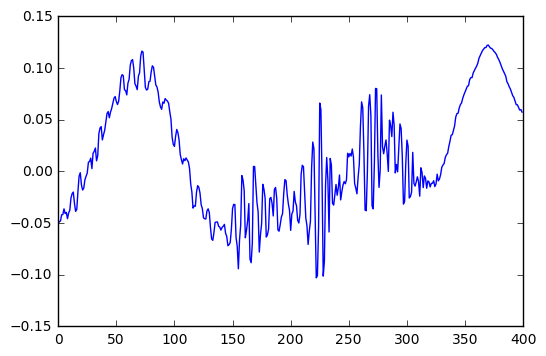

In [167]:
a = int(size(mySound2)/2)
downsample2 = arange(0,1,1/a)
for i in range (0, a) : # for i going from0 to a-1
        downsample2[i] = mySound2[i*2]
    
plot(downsample2[400:800])
play(downsample2, 22500)

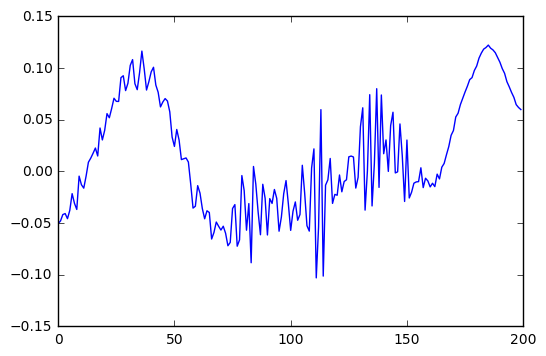

In [166]:
b = int(size(downsample2)/2)
downsample4 = arange(0,1,1/b)
for i in range (0, b) : # for i going from0 to a-1
        downsample4[i] = downsample2[i*2]
    
plot(downsample4[200:400])
play(downsample4, 11025)

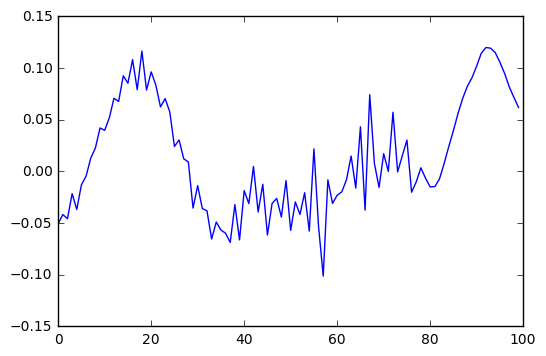

In [165]:
c = int(size(downsample4)/2)
downsample8= arange(0,1,1/c)
for i in range (0, c) : # for i going from0 to a-1
        downsample8[i] = downsample4[i*2]
    
plot(downsample8[100:200])
play(downsample8, 5512)

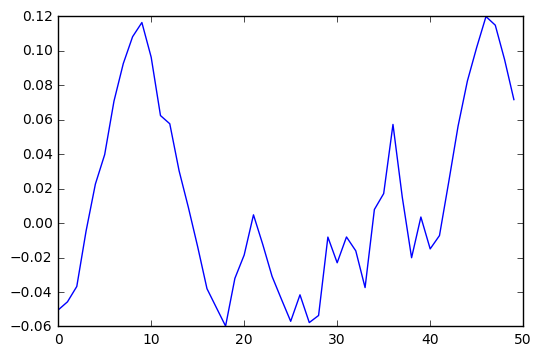

In [164]:
d = int(size(downsample8)/2)
downsample16= arange(0,1,1/d)
for i in range (0, d) : # for i going from0 to a-1
        downsample16[i] = downsample8[i*2]
    
plot(downsample16[50:100])
play(downsample16, 3000) # note - the browser does not seem to be able to play at a rate less than 3000

<i>Markdown</i>  and  $LaTeX:$ $a^2$

In [170]:
# Difference heard: despite the graph not showing a great deal of diffenrence, halving the samp. rate from 44100 made the sound appear less "crisp" and a bit muffled.
# Reducing further provoked a clear loss of quality, with the sound appearing to be coming out of low-quality or broken speakers
# Reducing further made the sound become very muffled, with a great loss of high and mid-high frequencies
# At a sampling rate of 2756 the sound quality was incredibly low. Only low and mid low frequencies were represented. 
# There was a lot of noise present, with the sound crackling noticeably
# Having said that, the "recognition" of the sound as being the same is surprising. 
# This tells me the recognition of pitch and the categorisation of sounds is much more reliant on bass frequencies (fundamentals) and envelope shape than anything else

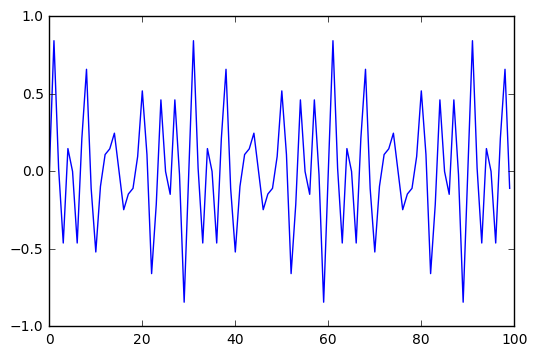

In [176]:
tal = arange(0, 1, 1/3000)
sa1 = .3*sin(500*tal * 2*pi)
sa2 = .3*sin(800*tal * 2*pi)
sa3 = .3*sin(900*tal * 2*pi)
asum = sa1 + sa2 + sa3

plot(asum[0:100])
play(asum, 3000)


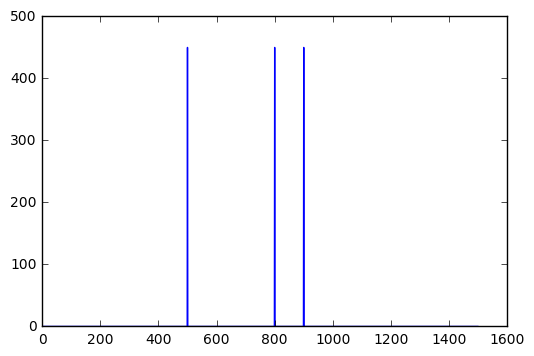

In [190]:
specal = fft.fft(asum)
freqa = fft.fftfreq(size(specal), 1/3000)
maga = abs(specal)
plot(freqa[0:1500],maga[0:1500])

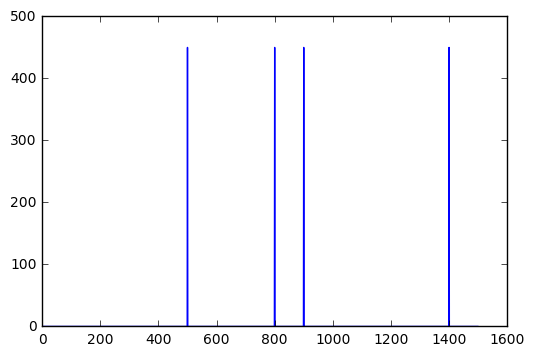

In [191]:
salias = .3*sin(1600*tal * 2*pi)
asum2 = salias+asum

specal2 = fft.fft(asum2)
freqa2 = fft.fftfreq(size(specal2), 1/3000)
maga2 = abs(specal2)
plot(freqa2[0:1500],maga2[0:1500])

In [192]:
# The aliased frequency of 1600 is represented at 1400 - which is 100 below the Nyquist of 1500, mirroring the fact that 1600 is 100 above it